# Bibliotecas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neural_network import MLPRegressor as rede_neural
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro
from scipy.stats import f_oneway
from sklearn.model_selection import GridSearchCV
import Classes as Cls
import pickle

# Funções

In [100]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(52):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [76]:
def describe_var_grafico(describe_var):
    mean_list = np.array(describe_var.iloc[1,:])
    std_list = np.array(describe_var.iloc[2,:])
    plt.plot(range(52),mean_list)
    plt.plot(range(52),mean_list-std_list)
    plt.plot(range(52),mean_list+std_list)

## Plot

In [4]:
def plot_(resultados_dataframe1,resultados_dataframe2 = False):
  aux_bool = True
  if(type(resultados_dataframe2)==type(aux_bool)):
    resultados_dataframe2 = resultados_dataframe1
    aux_bool = False


  fig=plt.figure(figsize=(10,8))
  plt.subplots_adjust(wspace=0.1, hspace=0.3)
  fig.suptitle('Distribuição das Distâncias Entre os Pontos')

  numb=1
  dist = {}
  
  for coluna in list(resultados_dataframe1)[:6]:
    dist_aux=[]
    ax=fig.add_subplot(2,3,numb)
    ax.set_title(coluna)

    for i in range(len(resultados_dataframe1[coluna])):
      if(aux_bool):
        i = 0
      else:
        i = i
      for j in range(i,len(resultados_dataframe2[coluna])):
        dist_aux.append(np.linalg.norm(np.array(resultados_dataframe1.loc[i,coluna]) - np.array(resultados_dataframe2.loc[j,coluna])))

    sns.histplot(dist_aux, kde=True, element='step')
    plt.tick_params(axis='y', labelsize=0, length=0)
    plt.ylabel([], fontsize=0)
    plt.xlabel('Distância')
    dist[coluna] = dist_aux
    numb+=1
  plt.show()
  return pd.DataFrame(dist)

# Importação dos modelos de aprendizado

In [5]:
n=10

funcao_demanda = lambda i,j: [(i*6-j*2)**2+10000]

x = [[j] for j in range(52) for i in range(n)]

y = pd.read_csv('demandas')['y'].values

In [6]:
with open("modelos_binarios", "rb") as arquivo_binario:
  while True:
    try:
        modelos = pickle.load(arquivo_binario)
    except EOFError:
        break

In [7]:
resultados = pd.DataFrame({'Random forest': modelos.medias_desempenho[0],
                           'Rede Neural': modelos.medias_desempenho[1],})

[]

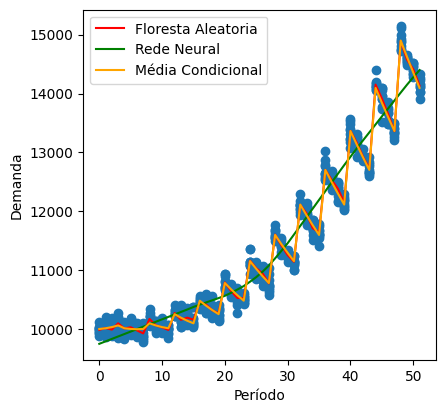

In [8]:
fig=plt.figure(figsize=(10,10))

x_unique = [[i] for i in range(52)]

medias_reais = [funcao_demanda(i,j) for i in range(13) for j in range(1,5)]

ax=fig.add_subplot(2,2,1)
plt.scatter(x,y)
plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(0,x_unique).reshape(-1,1)),color='red',label='Floresta Aleatoria')

plt.plot(x_unique,modelos.y_scale.inverse_transform(modelos.Predizer(1,x_unique).reshape(-1,1)),color='green',label='Rede Neural')

plt.plot(x_unique,medias_reais,color='orange',label='Média Condicional')

plt.ylabel('Demanda')
plt.xlabel('Período')


plt.legend()
plt.plot()

[]

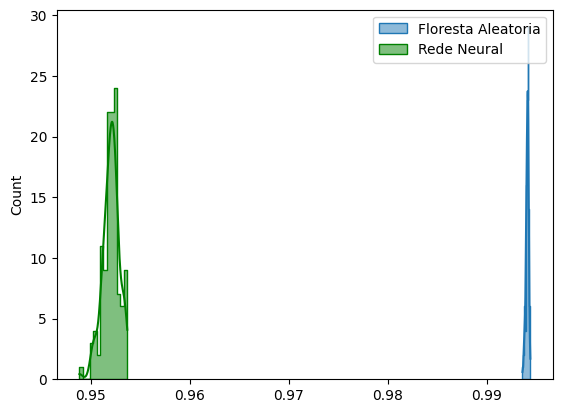

In [9]:
sns.histplot(modelos.medias_desempenho[0], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(modelos.medias_desempenho[1], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.plot()

In [10]:
resultados.describe()

,Random forest,Rede Neural
count,120.000000,120.000000
mean,0.994093,0.952044
std,0.000144,0.000845
min,0.993612,0.948869
25%,0.994014,0.951630
50%,0.994103,0.952095
75%,0.994184,0.952527
max,0.994410,0.953700


## Analise de Normalidade dos dados de desempenho médio

In [11]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(modelos.medias_desempenho[0])
_,p['Rede Neural'] = shapiro(modelos.medias_desempenho[1])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

Média amostral de desempenho da Random Forest não segue uma normal
Média amostral de desempenho da Rede Neural não segue uma normal


## Analise de comparação dos dados de desempenho médio

In [12]:
_,aux = f_oneway(modelos.medias_desempenho[0],modelos.medias_desempenho[1])

In [13]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuição diferentes


# Resultados Modelo PI

## Importação dos Dados

In [14]:
resultados_1 = pd.read_csv('Resultados_PI_RR').iloc[:,1:]
resultados_2 = pd.read_csv('Resultados_PI_RN').iloc[:,1:]

In [15]:
resultados_dataframe_1 = {}
for column in range(len(resultados_1.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_1.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_1.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_1[resultados_1.columns[column]] = coluna_aux

resultados_dataframe_1['ObjVal'] = resultados_1['ObjVal']

resultados_dataframe_1 = pd.DataFrame(resultados_dataframe_1)

In [16]:
resultados_dataframe_2 = {}
for column in range(len(resultados_2.columns[:-1])):
    coluna_aux = []
    for element in range(len((resultados_2.iloc[:,column]))):
        coluna_aux.append(np.array([float(elemento) for elemento in resultados_2.iloc[element,column][1:-1].split(',')]))
    
    resultados_dataframe_2[resultados_2.columns[column]] = coluna_aux

resultados_dataframe_2['ObjVal'] = resultados_2['ObjVal']

resultados_dataframe_2 = pd.DataFrame(resultados_dataframe_2)
        

In [17]:
resultados_dataframe_2

,x,s,y,xr,sr,yr,ObjVal
0,"[9927.469346211928, 9945.317101255689, 9963.16...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 498.2431262134139, 0.0, 0...","[99.27469346211929, 198.72786447467615, 298.35...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, -0.0, 0.0, 1...",14671.911901
1,"[9839.767770321796, 9872.724019753728, 9905.68...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 495.26728020059477, 1.111...","[98.39767770321797, 197.12491790075524, 296.18...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14670.963032
2,"[9847.349489981718, 9878.948875940476, 9908.98...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 495.4338731327862, 0.0, 0...","[98.47349489981718, 197.26298365922196, 296.35...","[-0.0, -0.0, -0.0, -0.0, 1.0, 0.0, 0.0, 0.0, 1...",14671.901736
3,"[9795.406162216386, 9830.304121808107, 9866.14...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 493.3003224016662, 0.0, 0...","[97.95406162216386, 196.25710284024495, 294.91...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14671.963652
4,"[9888.54554778879, 9914.404973780596, 9939.864...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 496.9436877227398, 0.0, 0...","[98.8854554778879, 198.02950521569386, 297.428...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14672.217365
...,...,...,...,...,...,...,...
195,"[9932.971327358326, 9949.088876063424, 9967.56...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 498.41268728728016, 0.0, ...","[99.32971327358325, 198.8206020342175, 298.496...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14673.232169
196,"[9840.698757967435, 9873.953936650192, 9907.20...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 495.33900819413446, 0.0, ...","[98.40698757967435, 197.14652694617627, 296.21...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14671.922305
197,"[9770.159830269957, 9806.797611715996, 9843.62...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 492.21655864220594, 0.0, ...","[97.70159830269957, 195.7695744198595, 294.205...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1....",14671.980516
198,"[9837.164145555815, 9867.364924490299, 9897.54...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 494.8770879985567, 0.0, 0...","[98.37164145555815, 197.04529070046112, 296.02...","[-0.0, -0.0, -0.0, 0.0, 1.0, 0.0, -0.0, -0.0, ...",14671.557029


## Analise das Distancias Entre os Pontos

### distancia entre os pontos provindos dos resultados do Random Forest, ou seja, as demandas foram obtidas pelo Random forest

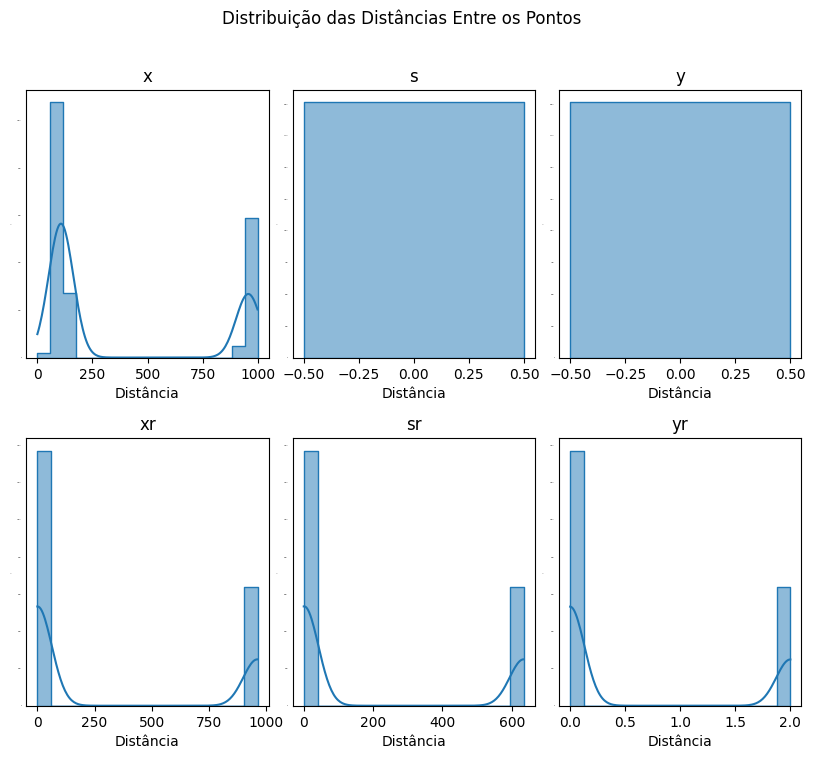

In [18]:
dist_1 = plot_(resultados_dataframe_1)

In [19]:
dist_1.describe()

,x,s,y,xr,sr,yr
count,20100.000000,20100.0,20100.0,20100.000000,20100.000000,20100.000000
mean,376.711412,0.0,0.0,307.039800,202.844582,0.636816
std,396.680441,0.0,0.0,447.696505,294.919611,0.931741
min,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,102.347767,0.0,0.0,0.975779,1.202544,0.000000
50%,114.549641,0.0,0.0,1.201398,1.423518,0.000000
75%,947.483806,0.0,0.0,961.862521,634.186476,2.000000
max,998.388260,0.0,0.0,962.891272,635.012246,2.000000


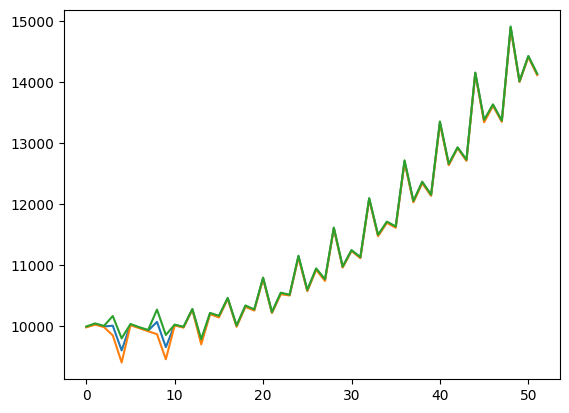

In [96]:
describe_x = describe_var(resultados_dataframe_1,'x').describe()
describe_var_grafico(describe_x)

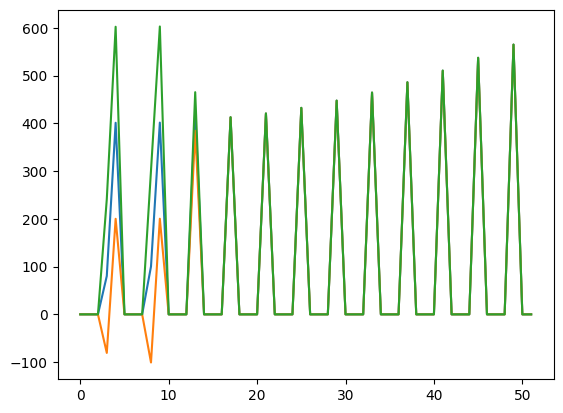

In [107]:
describe_xr = describe_var(resultados_dataframe_1,'xr').describe()
describe_var_grafico(describe_xr)

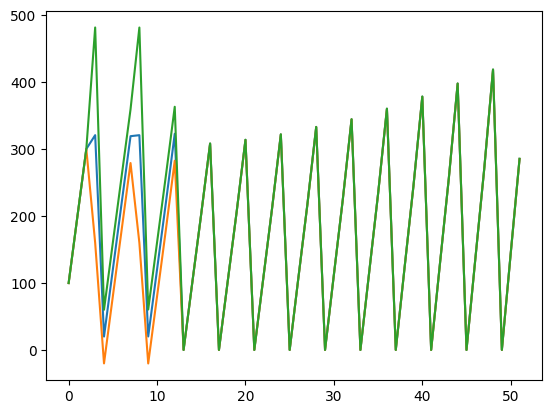

In [113]:
describe_sr = describe_var(resultados_dataframe_1,'sr').describe()
describe_var_grafico(describe_sr)

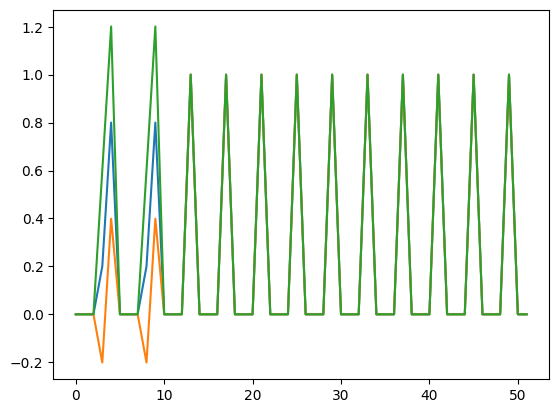

In [114]:
describe_yr = describe_var(resultados_dataframe_1,'yr').describe()
describe_var_grafico(describe_yr)

### distancia entre os pontos provindos dos resultados da Rede Neural, ou seja, as demandas foram obtidas pelo Rede Neural

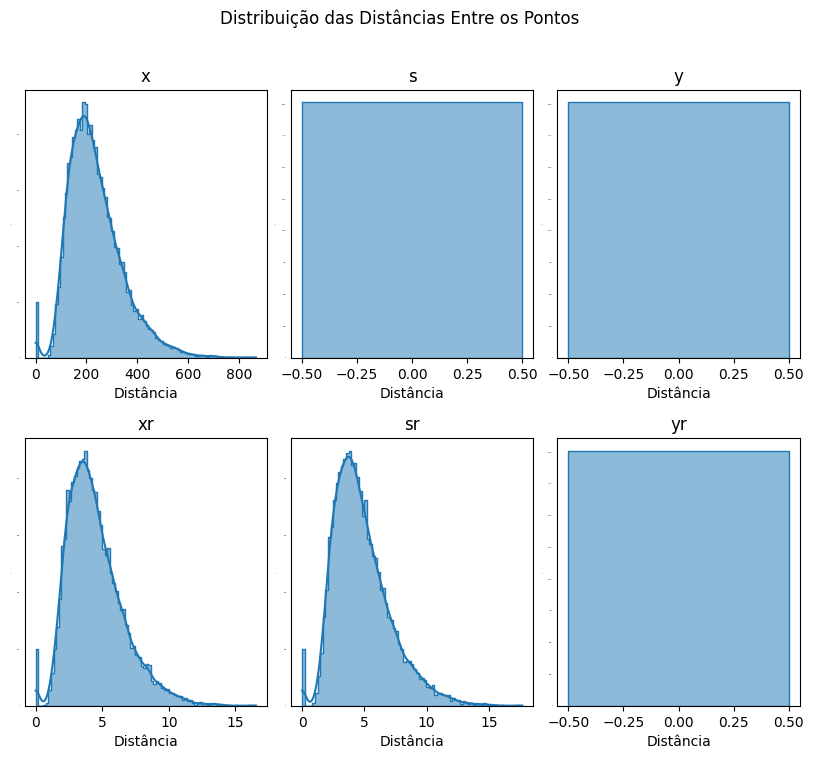

In [26]:
dist_2 = plot_(resultados_dataframe_2)

In [27]:
dist_2.describe()

,x,s,y,xr,sr,yr
count,20100.000000,20100.0,20100.0,20100.000000,20100.000000,20100.0
mean,235.442356,0.0,0.0,4.469650,4.798826,0.0
std,105.009402,0.0,0.0,2.094143,2.264998,0.0
min,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,161.108497,0.0,0.0,2.973313,3.179694,0.0
50%,217.458534,0.0,0.0,4.106049,4.384078,0.0
75%,292.100463,0.0,0.0,5.592187,6.011668,0.0
max,866.423584,0.0,0.0,16.531396,17.685812,0.0


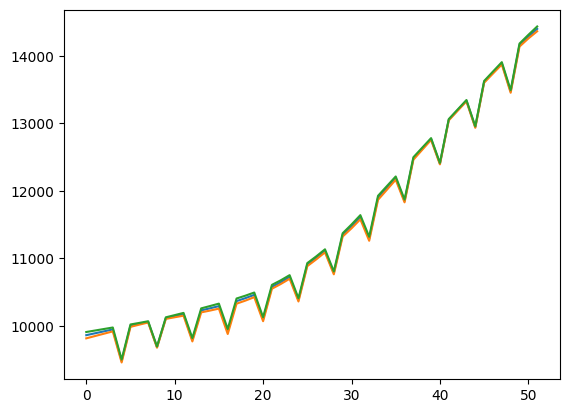

In [90]:
describe_2_x = describe_var(resultados_dataframe_2,'x').describe()
describe_var_grafico(describe_2_x)

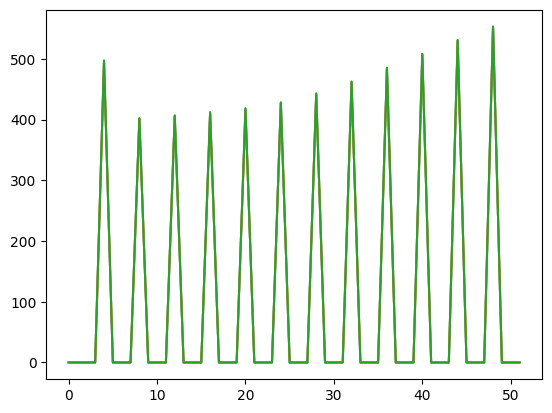

In [91]:
describe_2_xr = describe_var(resultados_dataframe_2,'xr').describe()
describe_var_grafico(describe_2_xr)

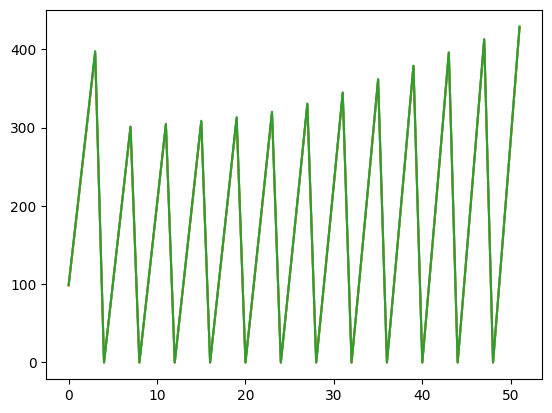

In [92]:
describe_2_sr = describe_var(resultados_dataframe_2,'sr').describe()
describe_var_grafico(describe_2_sr)

In [93]:
describe_2_sr

,sr1,sr2,sr3,sr4,sr5,sr6,sr7,sr8,sr9,sr10,...,sr43,sr44,sr45,sr46,sr47,sr48,sr49,sr50,sr51,sr52
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,...,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000
mean,98.614937,197.513315,296.694353,396.156983,3.678915e-13,100.024466,200.329367,300.914420,1.493221e-12,101.144761,...,262.470294,395.819780,8.617204e-13,136.138697,273.657550,412.543406,9.670634e-13,141.587087,284.419340,428.406708
std,0.469813,0.878131,1.225725,1.513058,2.216057e-12,0.177043,0.303544,0.384951,5.726104e-12,0.116173,...,0.187145,0.273801,4.537563e-12,0.129438,0.277198,0.442893,3.307318e-12,0.222871,0.486493,0.827354
min,97.630055,195.661697,294.094929,392.929754,0.000000e+00,99.597535,199.592273,299.979906,0.000000e+00,100.807513,...,262.061832,395.102978,0.000000e+00,135.714049,272.762078,411.144087,0.000000e+00,141.007995,283.072646,425.961871
25%,98.261482,196.841987,295.745015,394.981456,0.000000e+00,99.899700,200.126938,300.687600,0.000000e+00,101.077803,...,262.349660,395.626928,0.000000e+00,136.049574,273.452990,412.216951,0.000000e+00,141.444849,284.094717,427.865103
50%,98.604593,197.499563,296.682868,396.138951,0.000000e+00,100.013281,200.314271,300.891677,0.000000e+00,101.158430,...,262.444928,395.796938,0.000000e+00,136.140178,273.660042,412.585869,0.000000e+00,141.590447,284.423541,428.375669
75%,98.921086,198.080496,297.483391,397.124808,0.000000e+00,100.138980,200.543854,301.200495,0.000000e+00,101.214838,...,262.585214,395.965610,0.000000e+00,136.222471,273.846333,412.854273,0.000000e+00,141.744131,284.759811,428.985502
max,99.903500,199.923241,300.059222,400.311443,2.201261e-11,100.482014,201.050593,301.779078,4.767641e-11,101.473774,...,263.122791,396.848930,4.271362e-11,136.544639,274.484150,413.854966,2.648789e-11,142.186950,285.718317,430.568583


### distancia entre os pontos provindos dos resultados do Random Forest e entre da Rede Neural

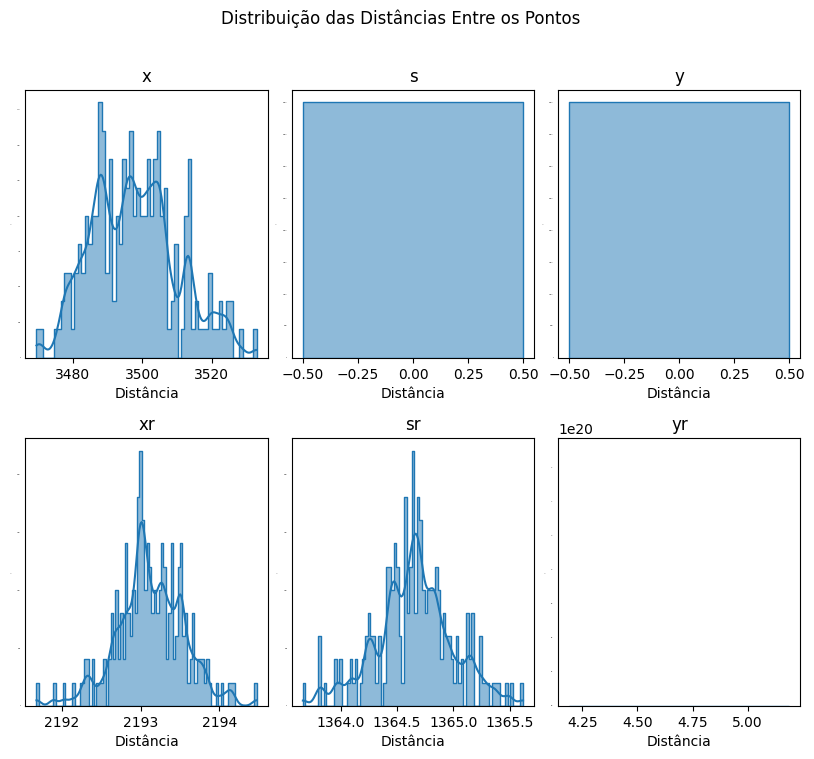

In [29]:
dist_3 = plot_(resultados_dataframe_1,resultados_dataframe_2)

In [30]:
dist_3.describe()

,x,s,y,xr,sr,yr
count,40000.000000,40000.0,40000.0,40000.000000,40000.000000,4.000000e+04
mean,3497.876925,0.0,0.0,2193.126896,1364.652644,4.690416e+00
std,12.410595,0.0,0.0,0.430394,0.345818,8.881895e-16
min,3469.601243,0.0,0.0,2191.677176,1363.666461,4.690416e+00
25%,3488.244909,0.0,0.0,2192.876961,1364.453908,4.690416e+00
50%,3497.172162,0.0,0.0,2193.099533,1364.651252,4.690416e+00
75%,3505.343860,0.0,0.0,2193.401998,1364.848636,4.690416e+00
max,3532.860882,0.0,0.0,2194.471710,1365.619119,4.690416e+00


## Analise dos valores objetivos obtidos


[]

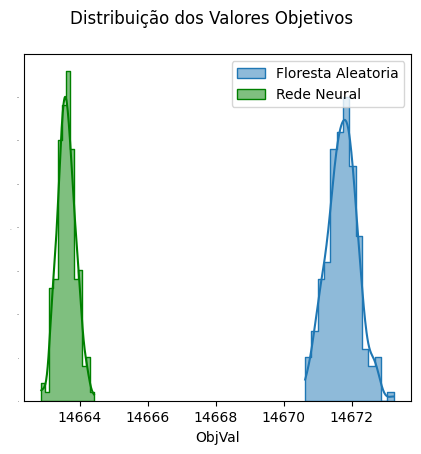

In [32]:
fig=plt.figure(figsize=(5,4.5))
fig.suptitle('Distribuição dos Valores Objetivos')

sns.histplot(resultados_dataframe_2['ObjVal'], kde=True, element='step',label='Floresta Aleatoria')
sns.histplot(resultados_dataframe_1['ObjVal'], kde=True, element='step',color='green',label='Rede Neural')
plt.legend()
plt.ylabel([], fontsize=0)
plt.tick_params(axis='y', labelsize=0, length=0)
plt.plot()

Random Forest

In [33]:
resultados_dataframe_1['ObjVal'].describe()

count      200.000000
mean     14663.606911
std          0.268192
min      14662.866407
25%      14663.435733
50%      14663.591257
75%      14663.783930
max      14664.413313
Name: ObjVal, dtype: float64

Rede Neural

In [34]:
resultados_dataframe_2['ObjVal'].describe()

count      200.000000
mean     14671.718898
std          0.450727
min      14670.628981
25%      14671.429245
50%      14671.722052
75%      14672.005161
max      14673.232169
Name: ObjVal, dtype: float64

In [35]:
alpha = 0.05
p={}
_,p['Random Forest'] = shapiro(resultados_dataframe_1['ObjVal'])
_,p['Rede Neural'] = shapiro(resultados_dataframe_2['ObjVal'])
for i in p:
    if p[i] <= alpha:
        print(f'Média amostral de desempenho da {i} não segue uma normal')
    else:
        print(f'Média amostral de desempenho da {i} segue uma normal')

Média amostral de desempenho da Random Forest segue uma normal
Média amostral de desempenho da Rede Neural segue uma normal


In [36]:
_,aux = f_oneway(resultados_dataframe_1['ObjVal'].values,resultados_dataframe_2['ObjVal'].values)

In [37]:
if aux < alpha:  
    print("A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes")
else:
    print("A hipotese nula não pode ser rejeitada. Dados provem da mesma distribuição")

A hipotese nula pode ser rejeitada. Dados provem de distribuições diferentes
